<font color="#CC3D3D"><p>
# Build models using PyCaret (a low-code ML library)
https://pycaret.org/    
https://pycaret.readthedocs.io/en/latest/api/regression.html    

- `INPUT`: 학습용(`X_train.csv`, `y_train`)과 평가용(`X_test.csv`) 데이터 
- `OUTPUT`: 위 데이터를 이용하여 구축한 모형이 생성한 예측결과(`submission.csv`)

**설치 방법**   
https://pycaret.readthedocs.io/en/latest/installation.html

##### Imports

In [2]:
#! pip install pycaret

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\ok\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\ok\anaconda3\python.exe -m pip install --upgrade pip' command.



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68727 sha256=c9273d4a970986910851a3897e39ebd0e02a0ca7910cc77dd48f885c9e1748f8
  Stored in directory: c:\users\ok\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=fb54ad9ae11aa30ac6e6773da86fa3c2ab579406b02614f11cd72515ef8cfd24
  Stored in directory: c:\users\ok\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.regression import *

import os

### 1. Read Data

In [2]:
X_df_train = pd.read_csv(os.path.abspath("../input")+'/X_train.csv', encoding='cp949')
X_df_test = pd.read_csv(os.path.abspath("../input")+'/X_test.csv', encoding='cp949')
y_train = pd.read_csv(os.path.abspath("../input")+'/y_train.csv', encoding='cp949')
IDtest = X_df_test.custid.unique()

In [3]:
'''
# 1st round 3등 데이터
X_train = pd.read_csv('train_features_3rd_winner.csv')
X_test = pd.read_csv('test_features_3rd_winner.csv')
y_train = pd.read_csv('y_train.csv')

X_train.head()
'''

,Unnamed: 0,custid,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,...,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807
0,0,0,14.370545,2.484907,11.972655,13.028055,12.067965,14.265185,11.867296,1.339774,1.386294,0.492476,0.167054,0.310155,0.310155,0.310155,0.167054,0.310155,0.310155,0.492476,2.079442,0.492476,0.530628,-0.216021,0.009658,0.013266,-0.047399,0.062706,0.366488,0.013581,-0.019518,-0.006540,0.000811,-0.011353,-0.007367,-0.014215,0.003284,-0.029803,-0.052239,0.410059,0.000059,0.011189,-0.009305,-0.001094,-0.004007,0.004511,-0.008062,0.009567,-0.025604,-0.338257,0.176283,-0.266436,0.125943,0.051000,0.025824,0.008534,-0.051602,-0.046710,0.072099,0.014264,0.032043,-0.005209,0.414135,0.093240,0.008479,-0.044969,-0.000881,-0.036891,0.069547,0.054921,-0.046131,-0.389682,-0.116275,-0.286267,0.074309,0.012590,-0.041130,0.043163,-0.452762,-0.382936,-0.055010,-0.015539,0.014338,0.304923,-0.292779,-0.123857,-0.117697,0.462381,-0.053783,-0.000834,0.000845,12.424638,10.026783,0.944462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.334454,0.000000,10.571343,2.484907,14.370545,12.067965,1.609438,2.079442,13.345509,13.926158,11.509429,0.693147,0.000000,2.397895,10.571343,0.000000,14.347903,12.045323,0.000000,1.098612,0.000000,1.098612,1.386294,0.000000,0.000000,1.386294,0.000000,0.0,0.000000,0.693147,0.000000,11.767575,0.000000,13.353477,12.709877,0.000000,0.000000,0.000000,0.000000,9.46506,0.000000,1.098612,0.000000,0.693147,0.693147,1.791759,0.000000,12.476104,0.000000,11.472114,12.591338,0.000000,10.173553,9.169623,0.000000,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,0.0,0.000000,11.767575,0.000000,0.000000,0.000000,0.000000,0.000000,13.554147,0.0,0.000000,9.465060,0.000000,0.000000,0.000000,0.000000,10.977995,10.682698,1.791759,1.945910,0.000000,0.000000,14.063933,0.000000,0.000000,11.761355,0.0000,0.000000,0.000000,0.0,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.945910,0.00000,0.0,0.000000,1.098612,2.302585,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,

In [9]:
'''
# 2등팀 feature engineering 참고
X_train = pd.read_csv(os.path.abspath("../features")+'/X_train_select_2nd.csv', encoding='cp949')
X_test = pd.read_csv(os.path.abspath("../features")+'/X_test_select_2nd.csv', encoding='cp949')
'''

In [4]:
# merge feature engineering 참고
X_train = pd.read_csv(os.path.abspath("../features")+'/X_train_shap_merge.csv', encoding='cp949')
X_test = pd.read_csv(os.path.abspath("../features")+'/X_test_shap_merge.csv', encoding='cp949')

### 2. Set up Environment
*This step initializes the training environment and performs the data preprocessing & feature engineering.*

In [5]:
df = X_train.merge(y_train)
exp01 = setup(
    df, target='age', ignore_features=['custid'], session_id=123,
    numeric_features = df.columns[1:-1].to_list(),
    numeric_imputation = 'zero',
    normalize = True,
    transformation = True,
    feature_selection = True, feature_selection_threshold = 0.8,
)

,Description,Value
0,session_id,123
1,Target,age
2,Original Data,"(21587, 982)"
3,Missing Values,False
4,Numeric Features,980
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(15110, 955)"


In [6]:
# Preprocessed Data
get_config('X_train')

,1059,290,768,660,539,50,920,299,912,699,...,1043,666,1436,1419,219,944,877,459,865,1128
5706,-0.887757,0.787762,1.186736,10.266862,1.607397,1.517324,1.138067,-0.882769,1.849425,-0.548899,...,2.186795,-0.077408,-0.773185,0.817177,0.840921,2.063637,1.052242,1.505529,0.068765,0.208284
19951,-0.887757,-0.807707,0.337055,-0.097401,-0.805211,0.150289,-1.572519,1.542582,-0.551761,-0.548899,...,-0.507845,-0.077408,0.247511,-0.204379,-0.947092,-0.564078,-0.103406,0.119616,0.121249,0.106010
5854,0.863290,-1.125584,0.110322,-0.097401,-1.168787,-0.711711,1.314137,1.552727,-1.198619,1.914737,...,-0.507845,-0.077408,0.614311,0.467147,0.932591,-0.870121,-1.131371,0.232128,0.999210,-0.099675
7137,0.863290,-0.797220,-0.382634,-0.097401,-0.761492,-1.111134,0.034309,-0.505933,1.656115,-0.548899,...,-0.507845,-0.077408,-1.033384,0.289115,0.453678,1.854291,-1.370451,-0.880907,0.644428,0.349237
13852,-0.887757,0.036646,1.053765,-0.097401,0.663684,1.199414,-0.773117,1.077539,-1.198619,-0.548899,...,-0.507845,-0.077408,2.207475,-0.729504,0.938095,-0.289029,-0.494363,-1.107726,0.122824,-1.275956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,0.230233,-0.045360,-1.548039,-0.097401,-0.768971,-0.651212,0.765837,-0.604787,-0.030791,-0.548899,...,-0.507845,-0.077408,-1.013216,-0.895557,-1.325473,-1.208297,0.789322,-0.250139,-1.663621,1.652348
15377,-0.887757,-0.184662,0.327461,-0.097401,-0.631402,0.386313,-0.629447,-1.029509,0.678660,-0.548899,...,1.684333,-0.077408,0.315676,0.335926,-1.325473,0.362131,0.580368,0.023394,0.378918,0.749490
17730,-0.887757,-0.150754,-0.274529,-0.097401,-0.615132,-1.227638,1.314137,1.631837,-1.198619,-0.548899,...,-0.507845,-0.077408,-0.595381,-1.163213,0.339568,-0.043798,-3.110985,-1.107726,0.855718,-0.033143
15725,1.204157,0.335097,-0.602591,-0.097401,-0.376179,0.246672,-0.097332,0.613458,0.678660,1.703714,...,-0.507845,-0.077408,-0.872530,-1.028553,0.610166,0.890503,1.143310,0.364420,-1.407794,0.945935


In [7]:
# save & load all global variables
#save_config('myvars.pkl')
#load_config('myvars.pkl')

### 3. Compare Models
*This step trains and evaluates performance of all estimators available in the model library using cross validation.*

In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [9]:
models = compare_models(n_select=3, include=['ridge', 'br', 'lightgbm'], sort='RMSE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,6.0562,67.0063,8.1855,0.3834,0.2097,0.1705,18.6460
br,Bayesian Ridge,6.2397,67.5557,8.2189,0.3784,0.2118,0.1766,5.1420
ridge,Ridge Regression,6.4068,72.6892,8.5218,0.3313,0.2192,0.1822,2.9740


### 4. Tune Models
*This step tunes the hyperparameters of a given estimator.*

In [10]:
models = [tune_model(m, optimize='RMSE', n_iter=10, fold=5) for m in models]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.5756,80.7076,8.9837,0.2666,0.2233,0.1864
1,6.3709,70.2088,8.3791,0.3652,0.2187,0.1819
2,6.3418,70.6669,8.4064,0.3439,0.2188,0.1808
3,6.2910,69.5929,8.3422,0.3553,0.2156,0.1782
4,6.4118,70.4994,8.3964,0.3419,0.2178,0.1822
Mean,6.3982,72.3351,8.5016,0.3346,0.2188,0.1819
SD,0.0970,4.2022,0.2421,0.0350,0.0025,0.0027


### 5. Ensemble Models

In [11]:
# Averaging
blender = blend_models(estimator_list=models, weights=[0.4,0.4,0.2], optimize='RMSE', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.2126,68.4002,8.2704,0.3784,0.2113,0.1748
1,6.1185,65.4984,8.0931,0.4078,0.2094,0.1740
2,6.0913,66.5104,8.1554,0.3825,0.2101,0.1729
3,6.0329,64.4279,8.0267,0.4032,0.2059,0.1702
4,6.1119,65.3445,8.0836,0.3900,0.2077,0.1725
Mean,6.1134,66.0363,8.1258,0.3924,0.2089,0.1729
SD,0.0580,1.3541,0.0830,0.0114,0.0019,0.0016


In [12]:
# Stacking
#stacker = stack_models(estimator_list=models, meta_model=create_model('ridge'), optimize='RMSE', fold=5)

### 6. Select Model
*This step returns the best model out of all trained models in current session.*

In [13]:
best_model = finalize_model(automl(optimize='RMSE'))
best_model

VotingRegressor(estimators=[('lightgbm',
                             LGBMRegressor(bagging_fraction=0.6, bagging_freq=4,
                                           boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           feature_fraction=0.9,
                                           importance_type='split',
                                           learning_rate=0.05, max_depth=-1,
                                           min_child_samples=96,
                                           min_child_weight=0.001,
                                           min_split_gain=0.7, n_estimators=180,
                                           n_jobs=-1, num_leaves=10,
                                           objective=None, rand...
                             BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=

### 7. Evaluate Model

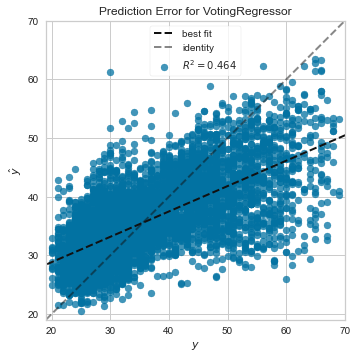

In [14]:
plot_model(best_model, plot='error')

### 8. Make Predictions

In [15]:
# Submission 결과: 8.28529
pred = np.array(predict_model(best_model, data=X_test).Label)
t = pd.Timestamp.now()
fname = f"../submissions/caret_submission_{t.month:02}{t.day:02}_{t.hour:02}{t.minute:02}.csv"
submissions = pd.concat([pd.Series(IDtest, name="custid"), pd.Series(pred, name="age")], axis=1)
submissions.to_csv(fname, index=False)
print("'{}' is ready to submit." .format(fname))

'../submissions/caret_submission_0615_2342.csv' is ready to submit.


<font color="#CC3D3D"><p>
# End